In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sells_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv'
buys_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv'
stocks_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv'
dividends_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv'

sells = pd.read_csv(sells_url)
buys = pd.read_csv(buys_url)
stocks = pd.read_csv(stocks_url)
dividends = pd.read_csv(dividends_url)

# Merge the dataframes
sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
sales = sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sales', '_stock'))

pd.options.display.float_format = '{:,.2f}'.format
# Display the merged dataframe
sales.head()

,id_sell,buy_id,date_sell,amt_sell,net_sell,days,profit,percent,yearly,dividend_id,id_buy,stock_id,date_buy,qty,amt_buy,net_buy,kind,id,name
0,1034,1266,2023-06-23,"32,100.00","32,028.90",3,"1,361.13",4.44,539.99,0,1266,129,2023-06-20,3000,"30,600.00","30,667.77",HD,129,CPNREIT
1,620,468,2018-02-06,"604,800.00","603,460.42",1687,"155,079.49",34.59,7.48,0,468,129,2013-06-25,27000,"447,390.00","448,380.93",DIV,129,CPNREIT
2,540,664,2020-03-13,"83,250.00","83,065.61",91,"-4,878.74",-5.55,-22.25,0,664,129,2019-12-13,3000,"87,750.00","87,944.35",DIV,129,CPNREIT
3,539,662,2020-03-13,"83,250.00","83,065.61",95,"-11,643.70",-12.29,-47.24,0,662,129,2019-12-09,3000,"94,500.00","94,709.31",DIV,129,CPNREIT
4,538,654,2020-03-13,"111,000.00","110,754.15",123,"-17,529.36",-13.66,-40.55,0,654,129,2019-11-11,4000,"128,000.00","128,283.51",DIV,129,CPNREIT


In [13]:
# Generate summary statistics for the sales dataframe
sales.describe(include='all')

,id_sell,buy_id,date_sell,amt_sell,net_sell,days,profit,percent,yearly,dividend_id,id_buy,stock_id,date_buy,qty,amt_buy,net_buy,kind,id,name
count,698.00,698.00,698,698.00,698.00,698.00,698.00,698.00,698.00,698.00,698.00,698.00,698,698.00,698.00,698.00,698,698.00,698
unique,NaN,NaN,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410,NaN,NaN,NaN,12,NaN,142
top,NaN,NaN,2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-15,NaN,NaN,NaN,DTD,NaN,ORI
freq,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,294,NaN,20
mean,673.75,755.97,NaN,"109,361.48","109,118.81",238.76,-891.12,3.05,127.86,365.54,755.97,111.68,NaN,"8,679.37","109,766.37","110,009.92",NaN,111.68,NaN
std,212.53,262.78,NaN,"84,506.31","84,319.16",330.41,"29,099.39",24.29,567.04,"1,820.33",262.78,51.80,NaN,"15,653.53","83,866.12","84,051.81",NaN,51.80,NaN
min,257.00,172.00,NaN,840.00,838.14,1.00,"-415,882.22",-85.27,-263.46,0.00,172.00,1.00,NaN,100.00,830.00,831.84,NaN,1.00,NaN
25%,497.25,530.50,NaN,"51,462.50","51,348.51",31.25,"-5,655.67",-5.10,-8.14,0.00,530.50,81.00,NaN,"2,425.00","53,875.00","53,994.33",NaN,81.00,NaN
50%,678.00,754.50,NaN,"94,500.00","94,290.69",98.00,"2,624.08",4.12,14.61,0.00,754.50,118.00,NaN,"5,000.00","95,000.00","95,210.42",NaN,118.00,NaN
75%,855.75,970.75,NaN,"128,000.00","127,716.49",324.75,"10,108.95",13.28,103.51,0.00,970.75,152.00,NaN,"10,000.00","130,000.00","130,287.94",NaN,152.00,NaN


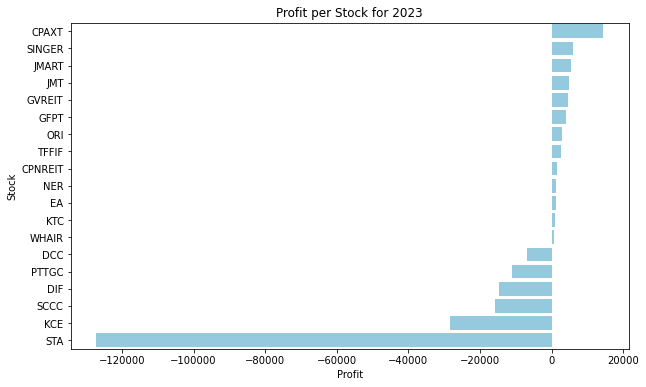

In [14]:
# Convert the 'date_sell' column to datetime
sales['date_sell'] = pd.to_datetime(sales['date_sell'])
# Filter the sales for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]

# Calculate the average profit per stock for the year 2023
profit_per_stock_2023 = sales_2023.groupby('name')['profit'].sum().sort_values(ascending=False)

# Create a bar chart for the average profit per stock for the year 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_stock_2023.values, y=profit_per_stock_2023.index, color='skyblue')
plt.title('Profit per Stock for 2023')
plt.xlabel('Profit')
plt.ylabel('Stock')
plt.show()

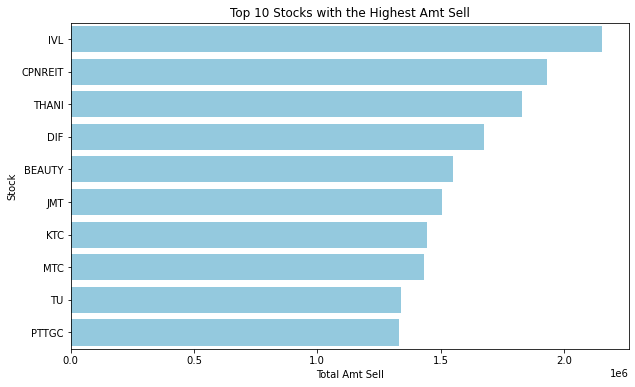

In [18]:
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest total amt sell
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, color='skyblue')
plt.title('Top 10 Stocks with the Highest Amt Sell')
plt.xlabel('Total Amt Sell')
plt.ylabel('Stock')
plt.show()

In [19]:
top_10_stocks

name
IVL       2,153,600.00
CPNREIT   1,929,400.00
THANI     1,827,500.00
DIF       1,676,000.00
BEAUTY    1,550,300.00
JMT       1,503,775.00
KTC       1,443,000.00
MTC       1,430,425.00
TU        1,338,200.00
PTTGC     1,332,500.00
Name: amt_sell, dtype: float64

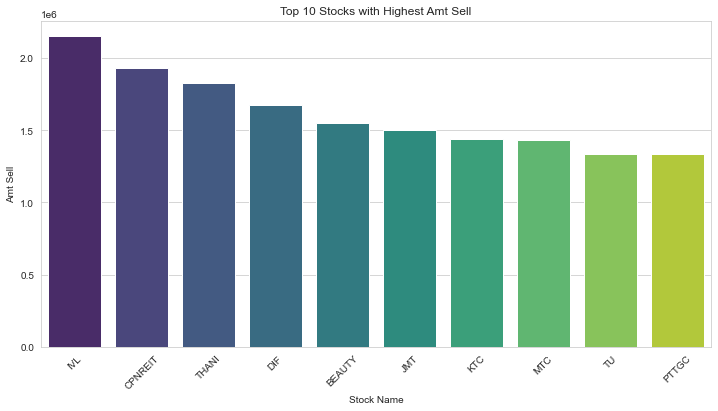

In [20]:
# Set the style of the visuals
sns.set_style('whitegrid')
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Amt Sell')
plt.xlabel('Stock Name')
plt.ylabel('Amt Sell')
plt.xticks(rotation=45)
plt.show()

In [22]:
top_10_stocks.to_frame()

,amt_sell
name,
IVL,"2,153,600.00"
CPNREIT,"1,929,400.00"
THANI,"1,827,500.00"
DIF,"1,676,000.00"
BEAUTY,"1,550,300.00"
JMT,"1,503,775.00"
KTC,"1,443,000.00"
MTC,"1,430,425.00"
TU,"1,338,200.00"


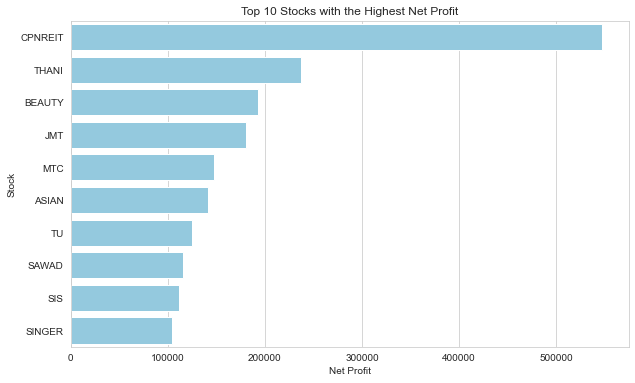

In [23]:
# Calculate the total net profit per stock
total_net_profit_per_stock = sales.groupby('name')['profit'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest net profit
top_10_stocks = total_net_profit_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, color='skyblue')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Stock')
plt.show()

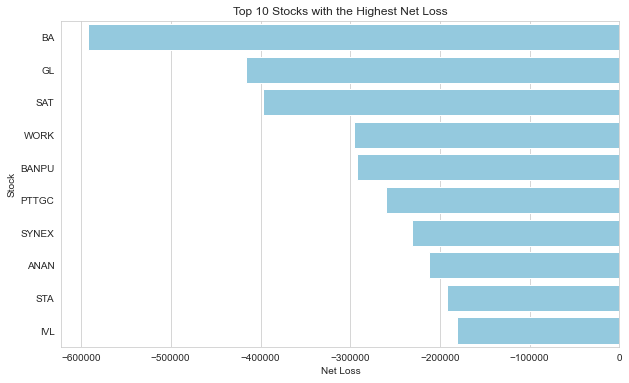

In [24]:
# Calculate the total net loss per stock
total_net_loss_per_stock = sales[sales['profit'] < 0].groupby('name')['profit'].sum().sort_values()

# Get the top 10 stocks with the highest net loss
top_10_stocks_with_highest_net_loss = total_net_loss_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net loss
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks_with_highest_net_loss.values, y=top_10_stocks_with_highest_net_loss.index, color='skyblue')
plt.title('Top 10 Stocks with the Highest Net Loss')
plt.xlabel('Net Loss')
plt.ylabel('Stock')
plt.show()

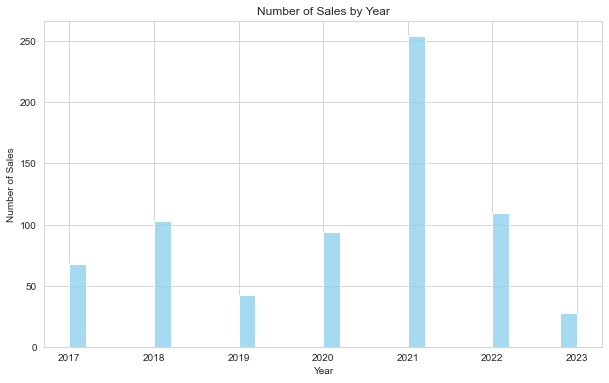

In [25]:
# Extract the year from the 'date_sell' column
sales['year'] = sales['date_sell'].dt.year

# Create a histogram for the number of sales by year
plt.figure(figsize=(10, 6))
sns.histplot(data=sales, x='year', bins=30, color='skyblue', kde=False)
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

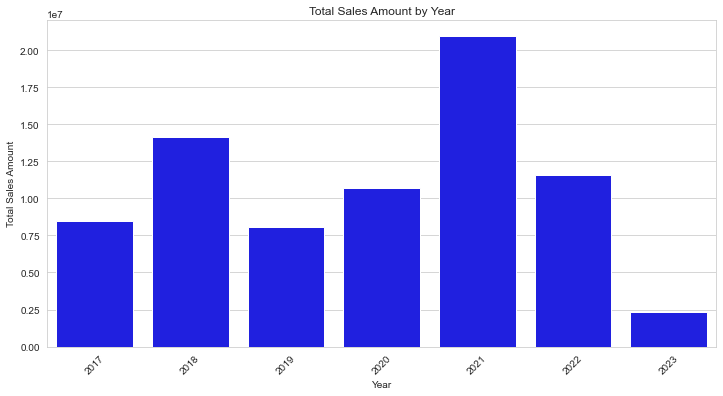

In [27]:
# Calculate the total sales amount by year
sales_amount_by_year = sales.groupby('year')['amt_sell'].sum()

# Create a bar plot for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [28]:
sales_amount_by_year

year
2017    8,451,890.00
2018   14,167,950.00
2019    8,085,675.00
2020   10,699,070.00
2021   20,976,595.00
2022   11,600,885.00
2023    2,352,250.00
Name: amt_sell, dtype: float64

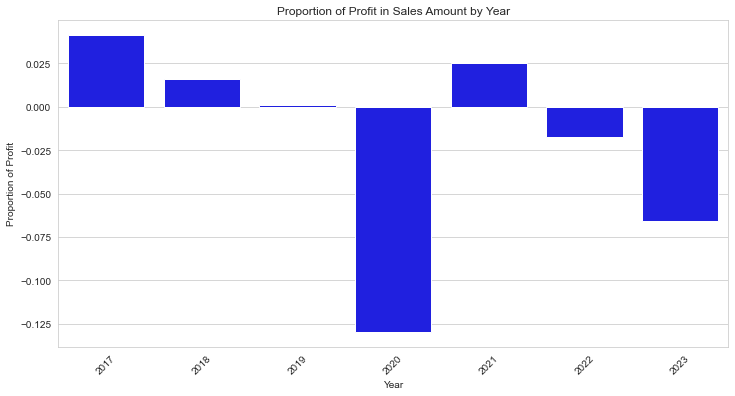

In [29]:
# Calculate the total profit by year
total_profit_by_year = sales.groupby('year')['profit'].sum()

# Calculate the proportion of profit in sales amount by year
profit_proportion_by_year = total_profit_by_year / sales_amount_by_year

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion_by_year.index, y=profit_proportion_by_year.values, color='blue')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

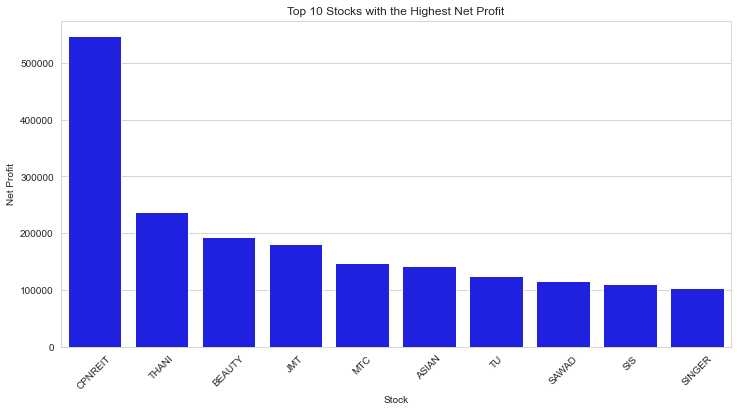

In [30]:
# Calculate the net profit for each stock
net_profit_by_stock = sales.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit
top_10_stocks = net_profit_by_stock.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, color='blue')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

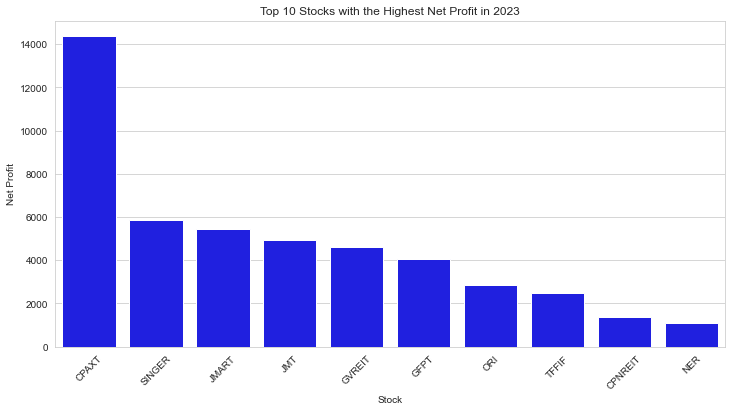

In [31]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]
# Calculate the net profit for each stock in 2023
net_profit_by_stock_2023 = sales_2023.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit in 2023
top_10_stocks_2023 = net_profit_by_stock_2023.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_2023.index, y=top_10_stocks_2023.values, color='blue')
plt.title('Top 10 Stocks with the Highest Net Profit in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

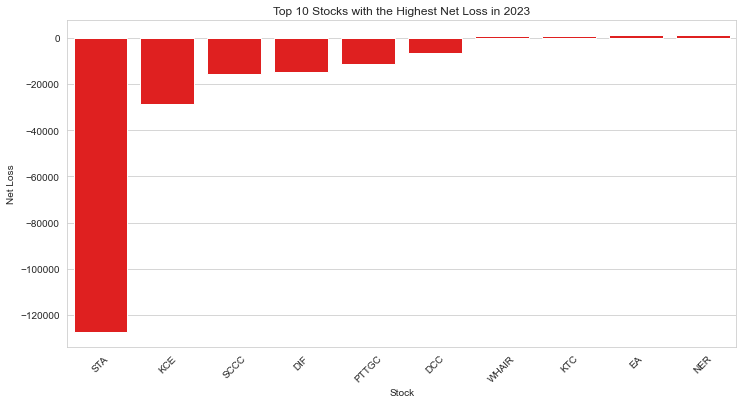

In [32]:
# Get the top 10 stocks with the highest net loss in 2023
top_10_stocks_loss_2023 = net_profit_by_stock_2023.nsmallest(10)

# Create a bar plot for the top 10 stocks with the highest net loss in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss_2023.index, y=top_10_stocks_loss_2023.values, color='red')
plt.title('Top 10 Stocks with the Highest Net Loss in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

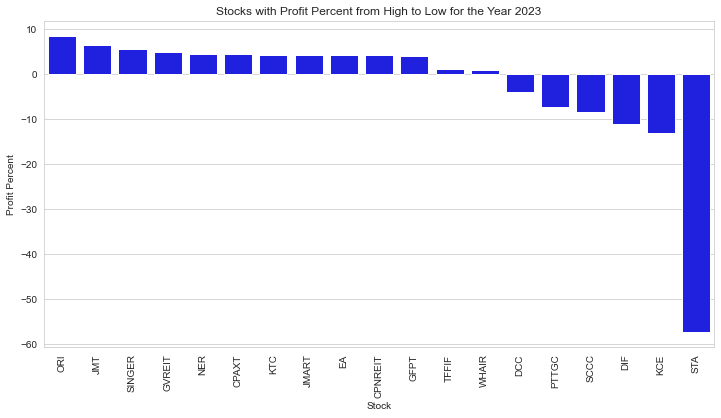

In [33]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]
# Calculate the profit percent for each stock in 2023
profit_percent_by_stock_2023 = (sales_2023.groupby('name')['profit'].sum() / sales_2023.groupby('name')['amt_sell'].sum()) * 100

# Sort the stocks by profit percent from high to low
profit_percent_by_stock_2023_sorted = profit_percent_by_stock_2023.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low for the year 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock_2023_sorted.index, y=profit_percent_by_stock_2023_sorted.values, color='blue')
plt.title('Stocks with Profit Percent from High to Low for the Year 2023')
plt.xlabel('Stock')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Display the profit percent by stock in 2023 in a table format
profit_percent_by_stock_2023_sorted.to_frame().reset_index().rename(columns={'name': 'Stock', 0: 'Profit Percent'})

,Stock,Profit Percent
0,ORI,8.51
1,JMT,6.42
2,SINGER,5.55
3,GVREIT,4.89
4,NER,4.53
5,CPAXT,4.51
6,KTC,4.33
7,JMART,4.33
8,EA,4.25
9,CPNREIT,4.24


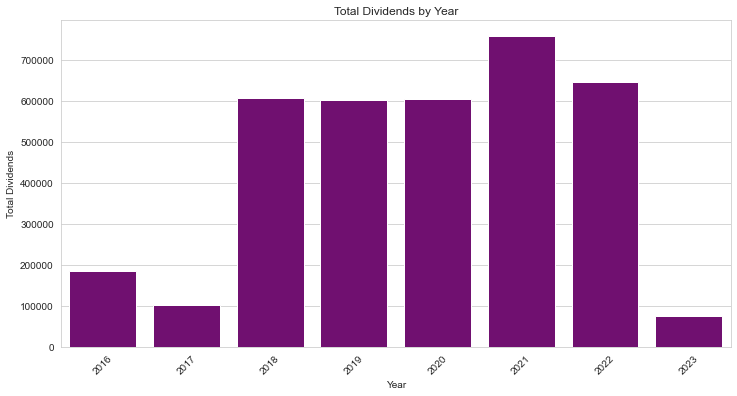

In [35]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [47]:
dividends_by_year

year
2016   185,537.60
2017   102,343.50
2018   605,859.60
2019   601,462.95
2020   603,486.53
2021   758,673.21
2022   646,064.60
2023    74,374.00
Name: amt, dtype: float64

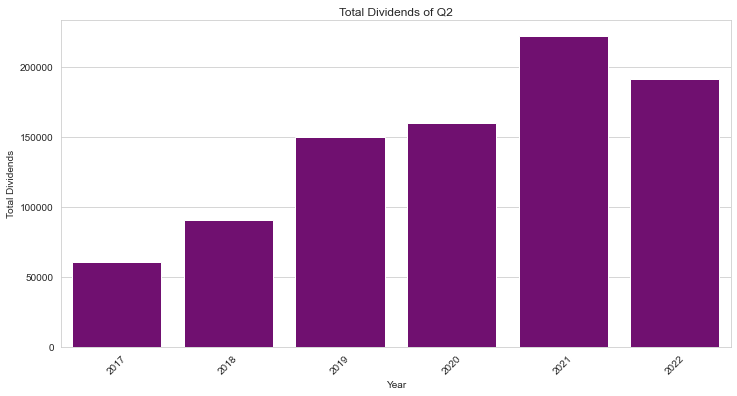

In [36]:
# Filter the dividends data for the year 2023
dividends_of_q2 = dividends[dividends['quarter'] == 2]
# Calculate the total dividends by year
dividends_by_qtr = dividends_of_q2.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by qtr
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_qtr.index, y=dividends_by_qtr.values, color='purple')
plt.title('Total Dividends of Q2')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [37]:
dividends_by_qtr

year
2017    60,443.50
2018    90,770.00
2019   150,239.30
2020   159,687.93
2021   222,239.40
2022   191,060.60
Name: amt, dtype: float64

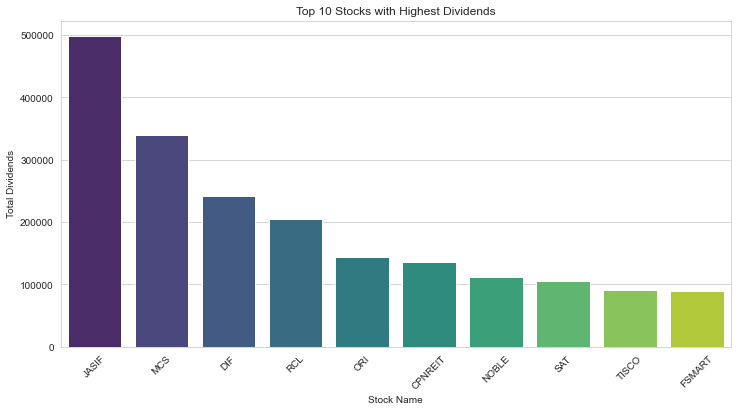

In [38]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [39]:
top_10_dividend_stocks

name
JASIF     498,200.00
MCS       339,050.00
DIF       241,639.50
RCL       204,000.00
ORI       144,350.00
CPNREIT   135,443.00
NOBLE     112,200.00
SAT       105,300.00
TISCO      91,400.00
FSMART     89,160.00
Name: amt, dtype: float64

In [46]:
# Calculate the total profit
total_profit = sales['profit'].sum()
total_profit

-622000.5100000001

In [44]:
# Calculate the total dividends
total_dividends = dividends['amt'].sum()
total_dividends

3577801.99